# <center> <font color='blue'>Aluno:</font> Bruno Lima de Freitas <center>
# <center> <font color='blue'>Universidade:</font> Universidade Federal Fluminense (UFF) <center>
# <center> <font color='blue'>Disciplina :</font> Estágio Curricular Obrigatório I <center>
# <center> <font color='blue'>Orientador:</font> Rodrigo Bijani <center>

# Objetivo do Trabalho
>&emsp;Este trabalho consta em criar um modelo isostático 2D com o uso da linguaguem python (OPEN SOURCE) no ambiente jupyter notebook, com o objetivo de apresentar uma alternativa para a correção isostática, ou seja, uma correção para o efeito da raiz crustal sobre dados gravimétricos aferidos em regiões cujo relevo é aproximado por uma função Gaussiana.

# Introdução    
>&emsp;Podemos ser levados a pensar que as massas topográficas estão simplesmente sobrepostas numa crosta essencialmente homogênea. Se assim fosse, a redução de Bouguer removeria as irregularidades médias do campo gravitacional, e assim as anomalias da gravidade de Bouguer seriam pequenas, tomando valores em torno de zero. No entanto, isso não se verifica. As anomalias de Bouguer em regiões montanhosas são sistematicamente negativas e podem tomar valores elevados, aumentando em média cerca de 100 mGal por 1000 metros de elevação. A única explicação possível é que há uma certa deficiência de massas sob as montanhas, o que faria com que o efeito das massas topográficas, sobre os valores medidos da gravidade, sofreria uma certa compensação. Foram desenvolvidas algumas teorias para justificar esta compensação e uma delas foi o modelo de Airy-Heiskanen que será utilizado durante esse trabalho de estágio curricular.

# Modelo de Airy-Heiskanen
>&emsp;O modelo de Airy (aplicado para fins geodésicos por Heiskanen) não considera variações de densidade mas trata a litosfera como tendo uma profundidade variável. Para manter o equilíbrio, a litosfera deverá ser mais espessa sob um relevo topográfico de maior altitude e mais fina sob os oceanos. Por razões de cálculo, a litosfera é vista como composta por blocos independentes. Todos essas questões estão sendo ilustradas na imagem abaixo:

<img src='estagio-modelo-airy.png' width="300px" align="center">

# Fluxo de Trabalho
>## Etapa 1
>>&emsp;Criar dados sintéticos que serão utilizados para gerar o relevo e consequentemente, a raiz crustal.
>## Considerações dessa etapa
>> (1) Considera-se que o relevo em estudo é bem ajustado por uma gaussiana; <br>
>> (2) Considera-se que o relevo é representado por apenas uma única montanha e de forma que ela esteja centralizada nos plots que serão gerados mais a frente deste trabalho. 

In [1]:
# Import das bibliotecas necessarias:
import sys # essa biblioteca está apenas relacionada com o uso das funções mostradas aqui pelo aluno e orientador eu seus computadores
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Path referente aa localizacao do modulo:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Gerando as informações para a construção do relevo: (Parte 1)
# Coletando os limites em x e z do levantamento sintético:
nobs = 51 # número de pontos a serem considerados
zmin = 0.0 # limite mínimo em z do levantamento sintético em km
zmax = 20.0 # limite máximo em z do levantamento sintético em km
xmin = 0.0 # limite mínimo em x do levantamento sintético em km
xmax = 100.0 # limite máximo em x do levantamento sintético em km

In [4]:
# Gerando as informações para a construção do relevo: (Parte 2)

# Definindo as coordenadas do levantamento sintético:
# Gerando valores para x:
x = np.linspace(xmin, xmax, nobs, endpoint=True)

# Gerando valores para z de forma que tenhamos algo próximo de uma gaussiana:
z = np.linspace(0, 0, nobs, endpoint=True)
aux = 7 # usada apenas para possibilitar a consideração de um relevo com pontos que estão ao nível de mar considerado
for i in range (nobs):
    if i < aux or (nobs - i) <= aux:
        z[i] = 0
    else:
        if (nobs - (2 * aux)) % 2 == 0:
            z_int = zmax / ((nobs/2) - aux)
            if i < (nobs/2):
                z[i] = - zmin - z_int * (i - aux + 1)
            else:
                z[i] = z[nobs - i - 1]
        else:
            z_int = zmax / ((nobs/2) + 0.5 - aux)
            if i < (nobs/2):
                z[i] = - zmin - z_int * (i - aux + 1)
            else:
                z[i] = z[nobs - i - 1]

>## Etapa 2
>>&emsp;Produzir um plot que contenha o relevo e a raiz crustal associada. Será considerado um nível de compensação que corresponde a maior profundidade da raiz crustal e para representar o relevo, uma gaussiana será utilizada. Essa gaussiana será gerada a partir dos dados sintéticos criados e por sua vez, eles já foram criados de forma que se aproximem de uma gaussiana.
>## Considerações dessa etapa
>> (1)

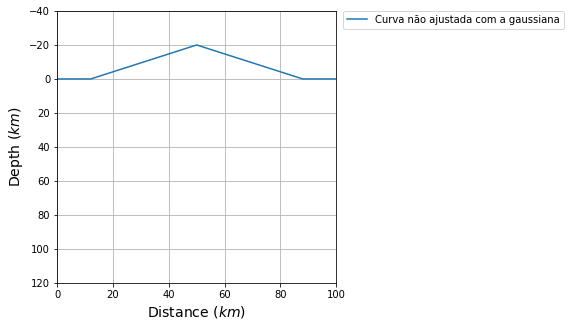

In [5]:
# Plotando uma curva com os dados sintéticos sem o ajuste com a gaussiana:
plt.figure( figsize=(5,5) ) # gerando a figura
plt.plot(x, z) # plotagem da curva
plt.xlim( [ x[0], x[nobs - 1]] ) # limites do eixo horizontal
plt.ylim(120, min(z) - 20) # limite do eixo vertical a ser ajustado quando for acrescentado o Moho
fs = 14 # tamanho da fonte para os labels
plt.ylabel('Depth $(km)$',fontsize=fs) # título do eixo vertical
plt.xlabel('Distance $(km)$',fontsize=fs) # título do eixo horizontal
plt.legend(['Curva não ajustada com a gaussiana'], loc=9, 
           bbox_to_anchor=(0.92, .925, 1., .095), ncol=1) # legendas
plt.grid() # visualização das linhas do grid
plt.show() # visualização do plot

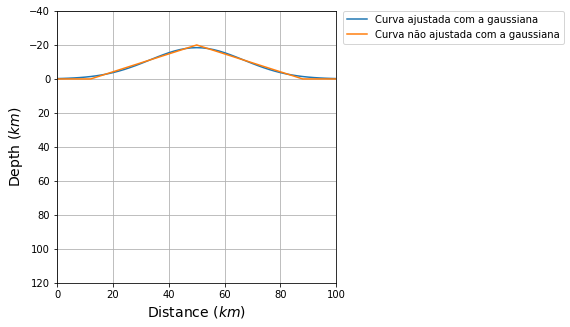

In [6]:
# Plotando a gaussiana produzida abaixo junto com a curva dos dados sintéticos:

# Biblioteca necessária para a produção da gaussiana:
from scipy.optimize import curve_fit

# Produzindo a gaussiana:
mean = sum(x*z)/sum(z)
sigma = np.sqrt(sum(z*(x - mean)**2)/sum(z))

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = curve_fit(gauss_function, x, z, p0 = [max(z), mean, sigma])

# Plotando as curvas:
plt.figure( figsize=(5,5) )
plt.plot(x, gauss_function(x, *popt)) 
plt.plot(x, z)
plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(120, min(z) - 20) # limite a ser ajustado quando for acrescentado o Moho
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(km)$',fontsize=fs)
plt.legend(['Curva ajustada com a gaussiana','Curva não ajustada com a gaussiana'], loc=9, 
           bbox_to_anchor=(0.92, .925, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

In [7]:
# Gerando o vetor com as profundidades da descontinuidade de Moho:
ref = 0.0 # valor para o nível de compensação
moho = np.zeros(nobs)
for i in range (nobs):
    moho[i] = ref - z[i]

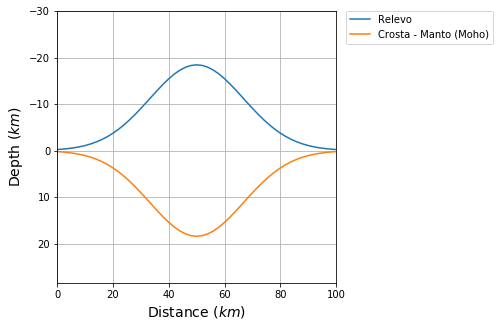

In [8]:
# Plotando o relevo representado pela gaussiana e a raiz crustal associada:
plt.figure( figsize=(5,5) )
plt.plot(x, gauss_function(x, *popt)) # relevo
plt.plot(x, -gauss_function(x, *popt) + ref) # moho
plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(max(-gauss_function(x, *popt)) + 10, min(z) - 10)
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(km)$',fontsize=fs)
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.80, .925, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

>## Etapa 3
>>&emsp;Associar massa a pontos em profundidade. Retângulos serão criados e usados para representar a crosta enquanto que diversos pontos individuais serão associados ao manto. Todos esses elementos serão associados a massas o que permitirá o cálculo da anomalia da gravidade.
>## Considerações dessa etapa
>> (1)

In [9]:
# Gerando os retângulos que serão acrescentados ao plot:
# Esses retângulos serão associados a uma determinada massa, gerando uma representação real de uma subsuperfície hipotética

# Numero de retangulos que se deseja:
nr = 20

# Gerandos os pontos que irão definir os centros dos retângulos:
# Pontos no eixo horizontal:
xr = np.linspace(xmin, xmax, nr, endpoint=True)

# Definindo as coordenadas dos retângulos que serão plotados:
xrmed = ( xr[0] + xr[1] ) / 2.0
x_ret = abs( xr[0] - ( xrmed ) ) 
# o valor x_ret será usado durante a etapa de visualização gráfica para a possibilizar a geração dos retangulos

x_plot = []
z_plot = []
for i in range(nr): # construindo listas com todas as coordenadas x e z dos pontos que formam todos os retângulos
    x_plot.append( [ xr[i] - x_ret, xr[i] + x_ret, xr[i] + x_ret, xr[i] - x_ret, xr[i] - x_ret ] )
    z_plot.append( [ gauss_function(xr[i], *popt), gauss_function(xr[i], *popt), -gauss_function(xr[i], *popt), 
                    -gauss_function(xr[i], *popt), gauss_function(xr[i], *popt) ] )

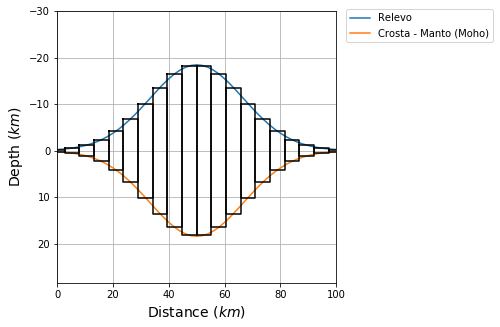

In [10]:
# Acrescentando os retângulos referentes a crosta ao nosso modelo de subsuperfície:
plt.figure( figsize=(5,5) )
plt.plot(x, gauss_function(x, *popt)) # relevo
plt.plot(x, -gauss_function(x, *popt) + ref) # moho

for i in range(nr):
    plt.plot( x_plot[i], z_plot[i], "black") # visualização dos retângulos

plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(max(-gauss_function(x, *popt)) + 10, min(z) - 10)
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(km)$',fontsize=fs)
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.8, .93, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

In [11]:
# Produzindos diversos pontos
# Esses pontos irão formar uma malha de forma que parte da malha seja referente ao manto
# Numero de pontos a serem relacionados ao manto:
npo = 200

# Produzindo as coordenadas desses pontos:
x_manto = np.linspace( xmin, xmax, npo, endpoint=True)
z_manto = np.linspace( zmin, max(-gauss_function(x, *popt)) + 10, npo, endpoint=True) 
# o valor máximo de z_manto deve ser ajustado se a escala do eixo vertical do plot apresentado for alterada

# Produzindo uma malha:
X,Z = np.meshgrid( x_manto, z_manto)

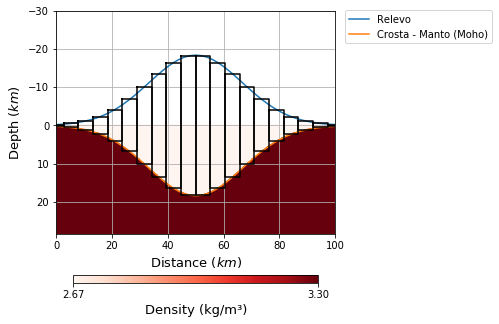

In [12]:
# Acrescentando os diversos pontos referentes ao manto:
plt.figure( figsize=(5,5) )
plt.plot(x, gauss_function(x, *popt)) # relevo
plt.plot(x, -gauss_function(x, *popt) + ref) # moho

for i in range(nr):
    plt.plot( x_plot[i], z_plot[i], "black") # visualização dos retângulos

col = np.copy(Z)
for i in range (Z.shape[0]):
    for j in range (Z.shape[1]):
        if col[j,i] > -gauss_function(X[i], *popt)[i]:
            col[j,i] = 3.3
        else:
            col[j,i] = 2.670

plt.scatter(X, Z, c=col, cmap='Reds', s=1)
cbar = plt.colorbar(aspect=30, fraction=0.03, orientation='horizontal', ticks=[2.670, 3.3])
cbar.set_label('Density (kg/m³)', fontsize=13, rotation=0)

plt.xlim( [ x[0] , x[nobs - 1]] )
plt.ylim(max(-gauss_function(x, *popt)) + 10, min(z) - 10)
fs = 13 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(km)$',fontsize=fs)
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.8, .93, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

>## Etapa 4
>>&emsp;Aplicando funções para se calcular a contribuição de todos os retângulos e os pontos gerados para a gravidade medida.
>## Considerações dessa etapa
>> (1)

In [13]:
# Importando bibliotecas

# Biblioteca para calcular a contribuição dos retangulos: 
from gravity2D import g_prism2D_Bruno

# Biblioteca para calcular a contribuição dos pontos:
from gravity2D import g_sphere

In [14]:
# Calculando a contribuicao de um unico retangulo para validar a funcao:

# Dados relacionados ao primeiro retangulo dos nossos dados sinteticos:
x = xr[0]
z = gauss_function(xr[0], *popt)
prism = [ xr[0], x_ret, 0, ( -2 * gauss_function(xr[0], *popt) )
         , 2.67] # para a funcao prism = [ x_prism, x_med, z_prism, L, rho]

# Aplicando a funcaos:
gz_rec = g_prism2D_Bruno(x,z,prism)
gz_rec

0.0008581912712131467

# Dúvida
> O que fazer com os retângulos das bordas?

In [15]:
# Calculando a contribuicao gravimetrica de todos os retangulos:
gz_rec = 0.0 # valor inicial 
for i in range (nr):
    # Dados relacionados ao primeiro retangulo dos nossos dados sinteticos:
    x = xr[i]
    z = gauss_function(xr[i], *popt)
    prism = [ xr[i], x_ret, 0, ( -2 * gauss_function(xr[i], *popt) )
             , 2.67] # para a funcao prism = [ x_prism, x_med, z_prism, L, rho]
    gz_rec += g_prism2D_Bruno(x,z,prism)

gz_rec # o valor de contribuicao gravimetrica de todos os retangulos

0.0031633004135212207

In [ ]:
# Calculando a contribuicao de um unico ponto para validar a funcao:

In [ ]:
# Calculando a contribuicao gravimetrica de todos os pontos: